#AIM:

##In this Project,On the basis of the mobile Specification like Battery power, internal memory , camera ,processor, Ram etc we are predicting Price range of the mobile.

In this data:

battery_power:Total energy a battery can store in one time measured in mAh

clock_speed:speed at which microprocessor executes instructions

fc:Front Camera mega pixels

int_memory:Internal Memory in Gigabytes

m_dep:Mobile Depth in cm

mobile_wt:Weight of mobile phone

n_cores:Number of cores of processor

pc:Primary Camera mega pixels

px_height:Pixel Resolution Height

px_width:Pixel Resolution Width

ram:Random Access Memory in Megabytes

sc_h:Screen Height of mobile in cm

sc_w:Screen Width of mobile in cm

talk_time:longest time that a single battery charge will last when you are

price_range:This is the target variable with the value of 0(low
cost), 1(medium cost), 2(high cost) and 3(very high cost).






#Import Libraries
##Import a few libraries you think you'll need (Or just import them as you go along!)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report




In [ ]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')

# display all the columns
pd.set_option('display.max_columns',None)

##Now, let’s read our dataset

In [ ]:
df = pd.read_csv('Mobile_data.csv')
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [ ]:
df.tail()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0
1999,510,2.0,5,45,0.9,168,6,16,483,754,3919,19,4,2,3


there are 0 value of certain columns as seen above we can check later


In [ ]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

#Data Preprocessing


In [ ]:
print(df.shape)                 # there are 2000 rows and 15 columns


(2000, 15)


In [ ]:
df.describe(include='all')


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [ ]:
# on the basis of std it shows that there are outliers in fc, px_height variable

In [ ]:
df.dtypes


battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

all the variables are numeric in nature

In [ ]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
battery_power 1094
clock_speed 26
fc 20
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
price_range 4


Detecting those variables which contain 0 value

In [ ]:
camera = df[(df['pc']==0) & (df['fc']==0)]
camera

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
7,1954,0.5,0,24,0.8,187,4,0,512,1149,700,16,3,5,0
33,1310,2.2,0,51,0.6,100,4,0,178,1919,3845,7,0,12,3
52,1654,1.5,0,43,0.3,109,2,0,546,629,3112,12,5,10,3
54,1073,0.5,0,51,0.5,145,7,0,690,804,2908,6,0,18,2
62,1156,1.2,0,50,0.8,159,2,0,322,547,470,7,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1807,0.8,0,38,0.2,97,8,0,1332,1814,1069,7,6,7,1
1911,1259,1.2,0,13,0.5,97,2,0,1210,1989,340,17,13,4,0
1931,1854,0.9,0,33,0.4,195,1,0,665,718,1675,14,12,9,1
1968,1667,1.0,0,21,0.9,138,2,0,1211,1396,635,17,7,15,0


In [ ]:
width = df[(df['sc_w']==0)]
width

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
12,1815,2.8,2,33,0.6,159,4,17,607,748,1482,18,0,2,1
24,503,1.2,5,8,0.4,111,3,13,201,1245,2583,11,0,12,1
33,1310,2.2,0,51,0.6,100,4,0,178,1919,3845,7,0,12,3
42,1253,0.5,5,5,0.2,152,2,19,685,714,1878,15,0,4,1
50,1547,3.0,2,14,0.7,198,3,19,1042,1832,2059,5,0,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,1.0,0,23,0.6,97,7,11,317,1805,2782,7,0,17,2
1920,591,0.5,1,16,0.9,90,6,17,892,1603,3746,5,0,5,3
1946,590,1.2,0,32,0.4,141,6,1,227,509,1817,10,0,6,0
1954,686,2.7,0,36,0.1,194,4,1,64,745,1503,10,0,13,0


In [ ]:
df=df.replace([0],np.nan)

In [ ]:
df.isnull().sum()

battery_power      0
clock_speed        0
fc               474
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
price_range      500
dtype: int64

there are 4 ind variable which contain 0 value lets impute them with its mean

In [ ]:
#replace missing values with mean values
for value in ['fc', 'pc', 'sc_w','px_height']:
  df[value].fillna(df[value].mean(), inplace=True)

In [ ]:
df=df.replace([np.nan],0)

In [ ]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [ ]:
df.duplicated().sum()                  #no duplicates

0

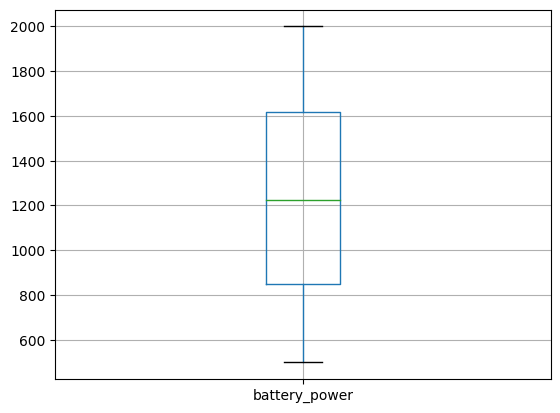

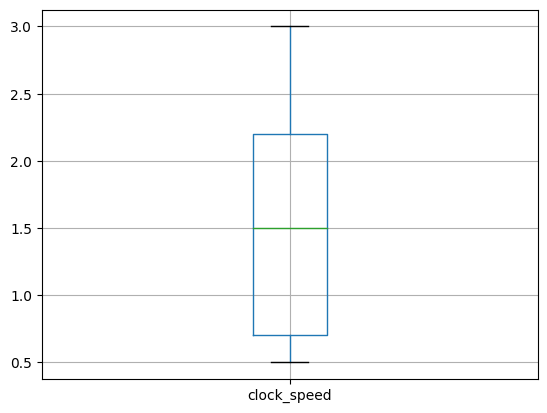

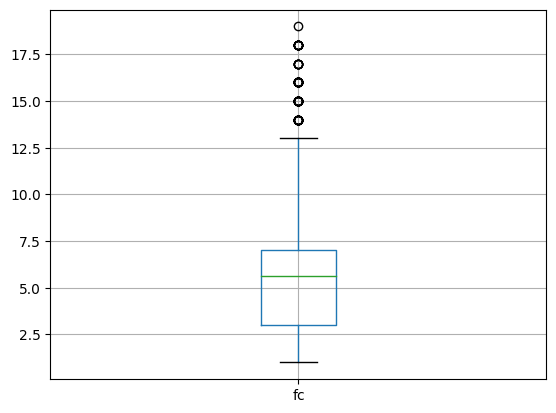

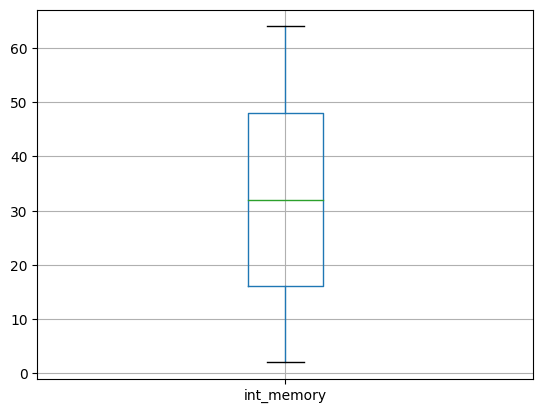

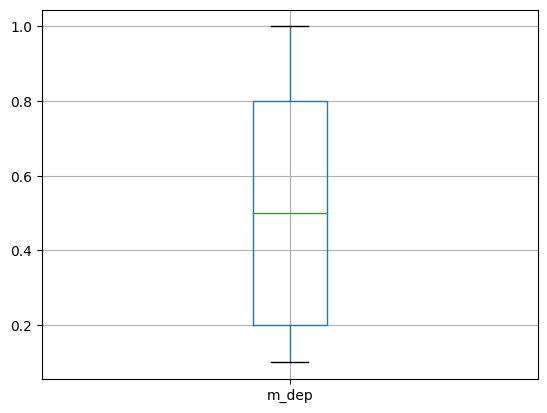

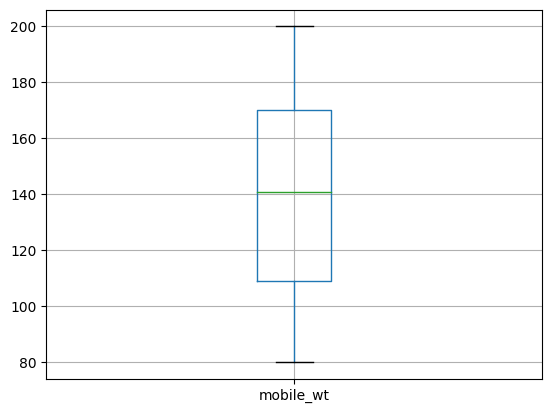

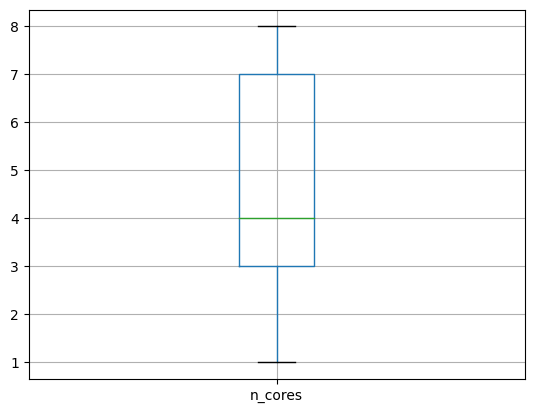

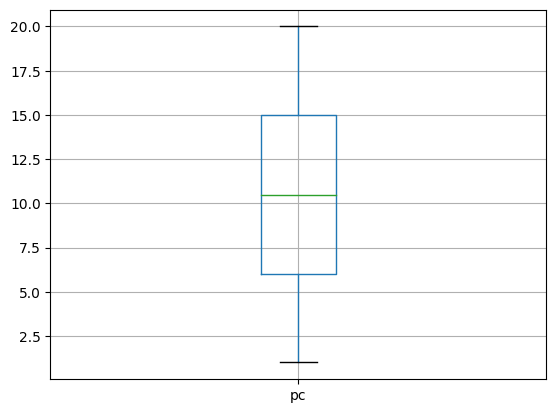

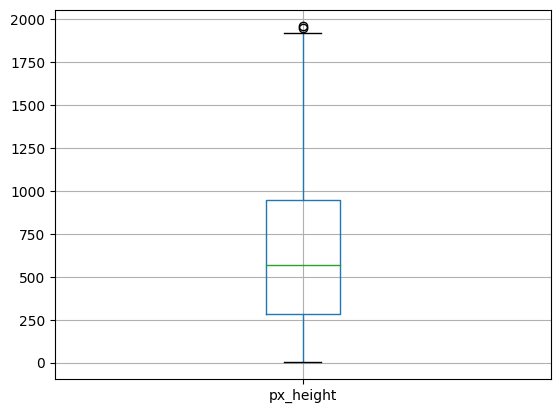

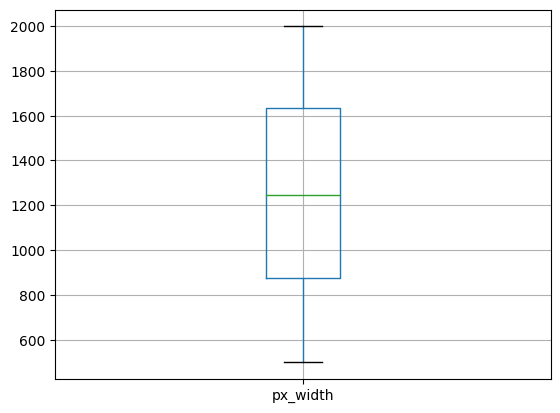

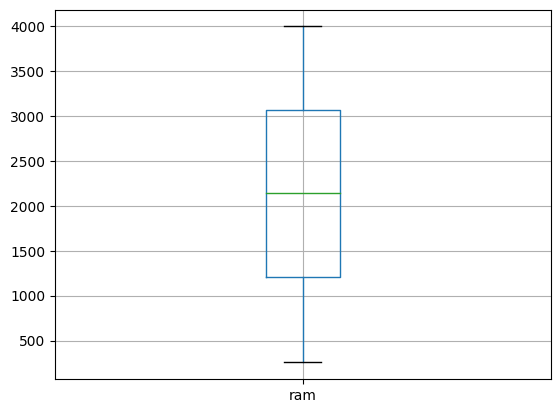

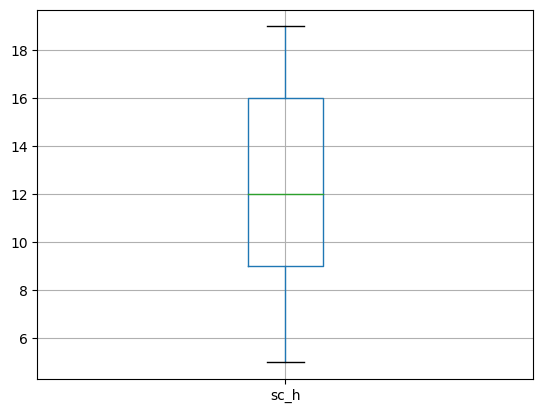

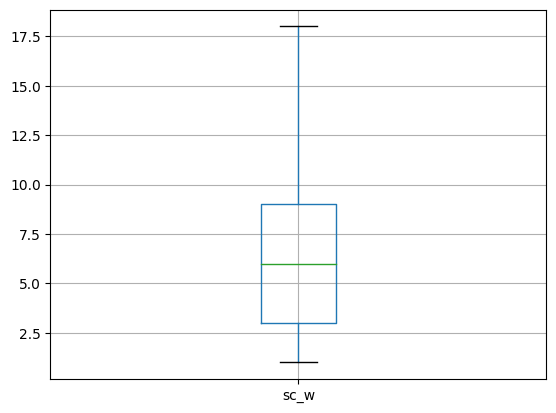

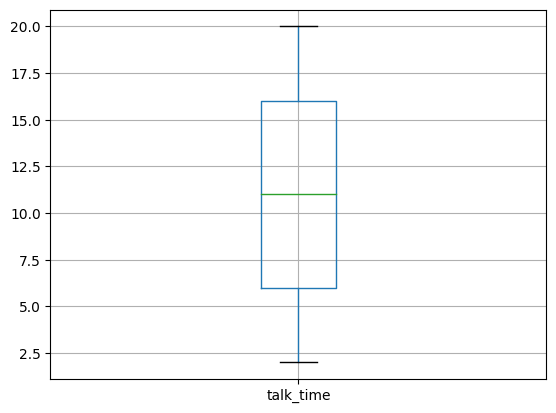

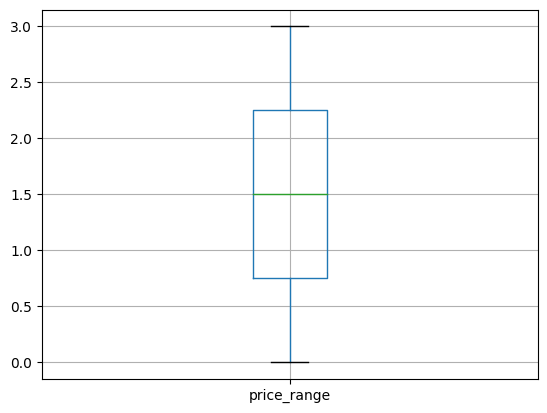

In [ ]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [ ]:
# as i mentioned before above there's probably an outliers in fc, px height  column and we found some outliers there
# we won't worry about the outliers because it seems it only small proportion of the value


#Let’s find out how many of each class are:

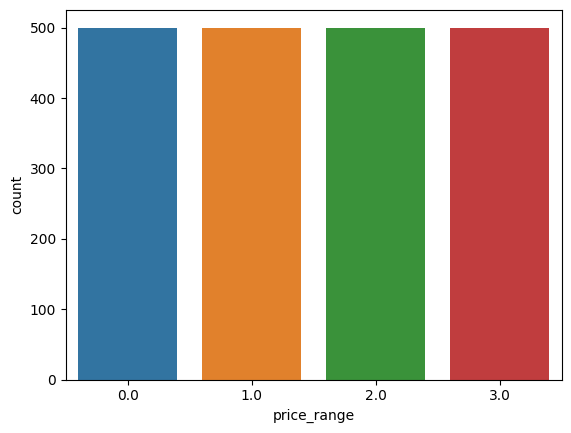

In [ ]:
sns.countplot(x='price_range',data=df)
plt.show()

 all classes are equally distributed

##Exploratory Data Analysis

<Axes: xlabel='price_range', ylabel='ram'>

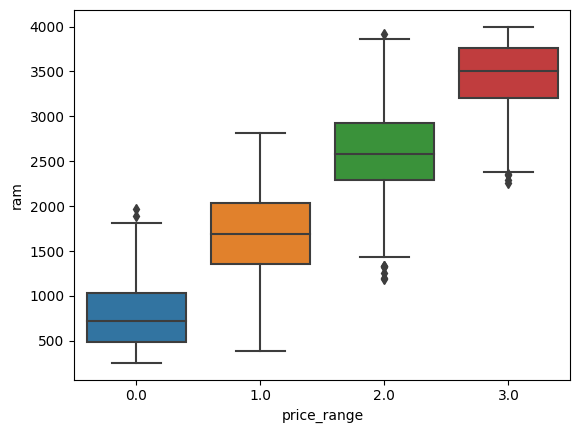

In [ ]:
sns.boxplot(x="price_range", y="ram", data=df)


In [ ]:
# Low Cost phones having ram in the range of 500mb to 1,800mb.
# Medium Cost phones having ram in the range of 1,300mb to 2,000mb.
# High Cost phones having ram in the range of 2,300mb to 2,900mb.
# Very high Cost phones having ram in the range of 3,300mb to 3,800mb.
# from the above boxplot plot we can see that RAM is the clearest indicator for determining the price of the phone.



<Axes: xlabel='price_range', ylabel='battery_power'>

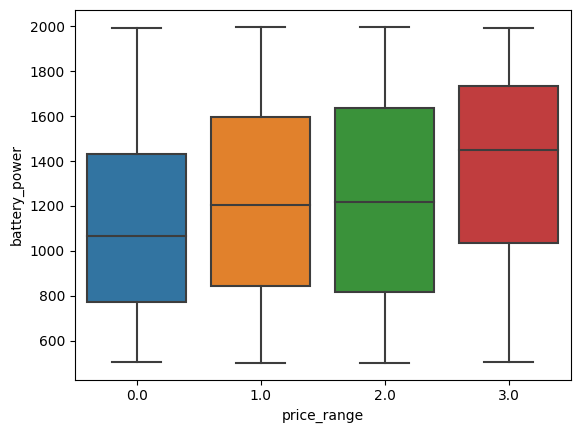

In [ ]:
# Battery power vs Price Range

sns.boxplot(x="price_range", y="battery_power", data=df)


In [ ]:
# Low Cost phones having Battery in the range of 790mah to 1,410mah.
# Medium Cost phones having Battery in the range of 900mah to 1,600mah.
# High Cost phones having Battery in the range of 800mah to 1,620mah.
# Very high Cost phones having Battery in the range of 1,050mah to 1,750mah.

<Axes: xlabel='pc', ylabel='fc'>

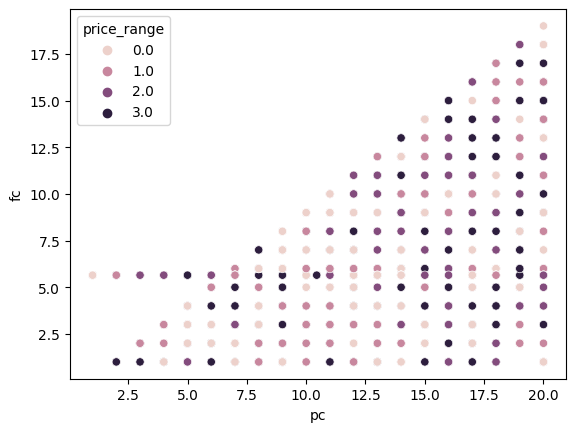

In [ ]:
sns.scatterplot(data=df, y="fc", x="pc",hue = 'price_range')


In [ ]:
# Here's something interesting in the above scatterplot,

# The phone with the best combination of primary and front camera falls in the low price region.(Point at the top right corner)


<Axes: xlabel='price_range', ylabel='int_memory'>

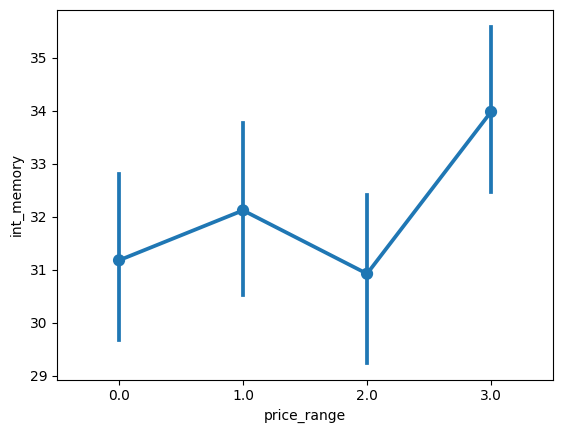

In [ ]:
# Internal Memory vs Price Range

sns.pointplot(y="int_memory", x="price_range", data=df)


<Axes: xlabel='price_range', ylabel='talk_time'>

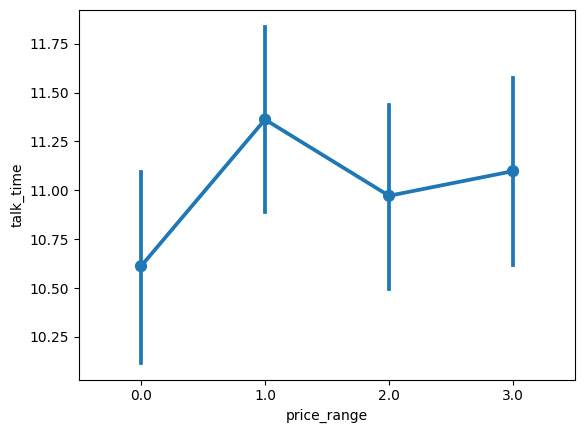

In [ ]:
# Talk time vs Price range

sns.pointplot(y="talk_time", x="price_range", data=df)

Text(0.5, 0, 'MegaPixels')

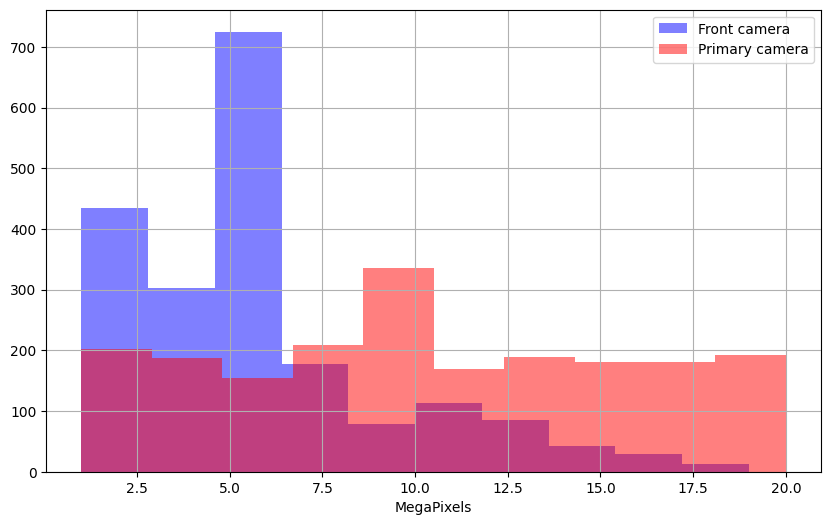

In [ ]:
# No of Phones vs Camera megapixels of front and primary camera¶

plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')


MOst of Phone has Primary camera of 20 mega pixel

MOst of Phone has   Front camera of5 to 6 mega pixel

In [ ]:


df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'int_memory'}>],
       [<Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>,
        <Axes: title={'center': 'pc'}>],
       [<Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'price_range'}>, <Axes: >]], dtype=object)

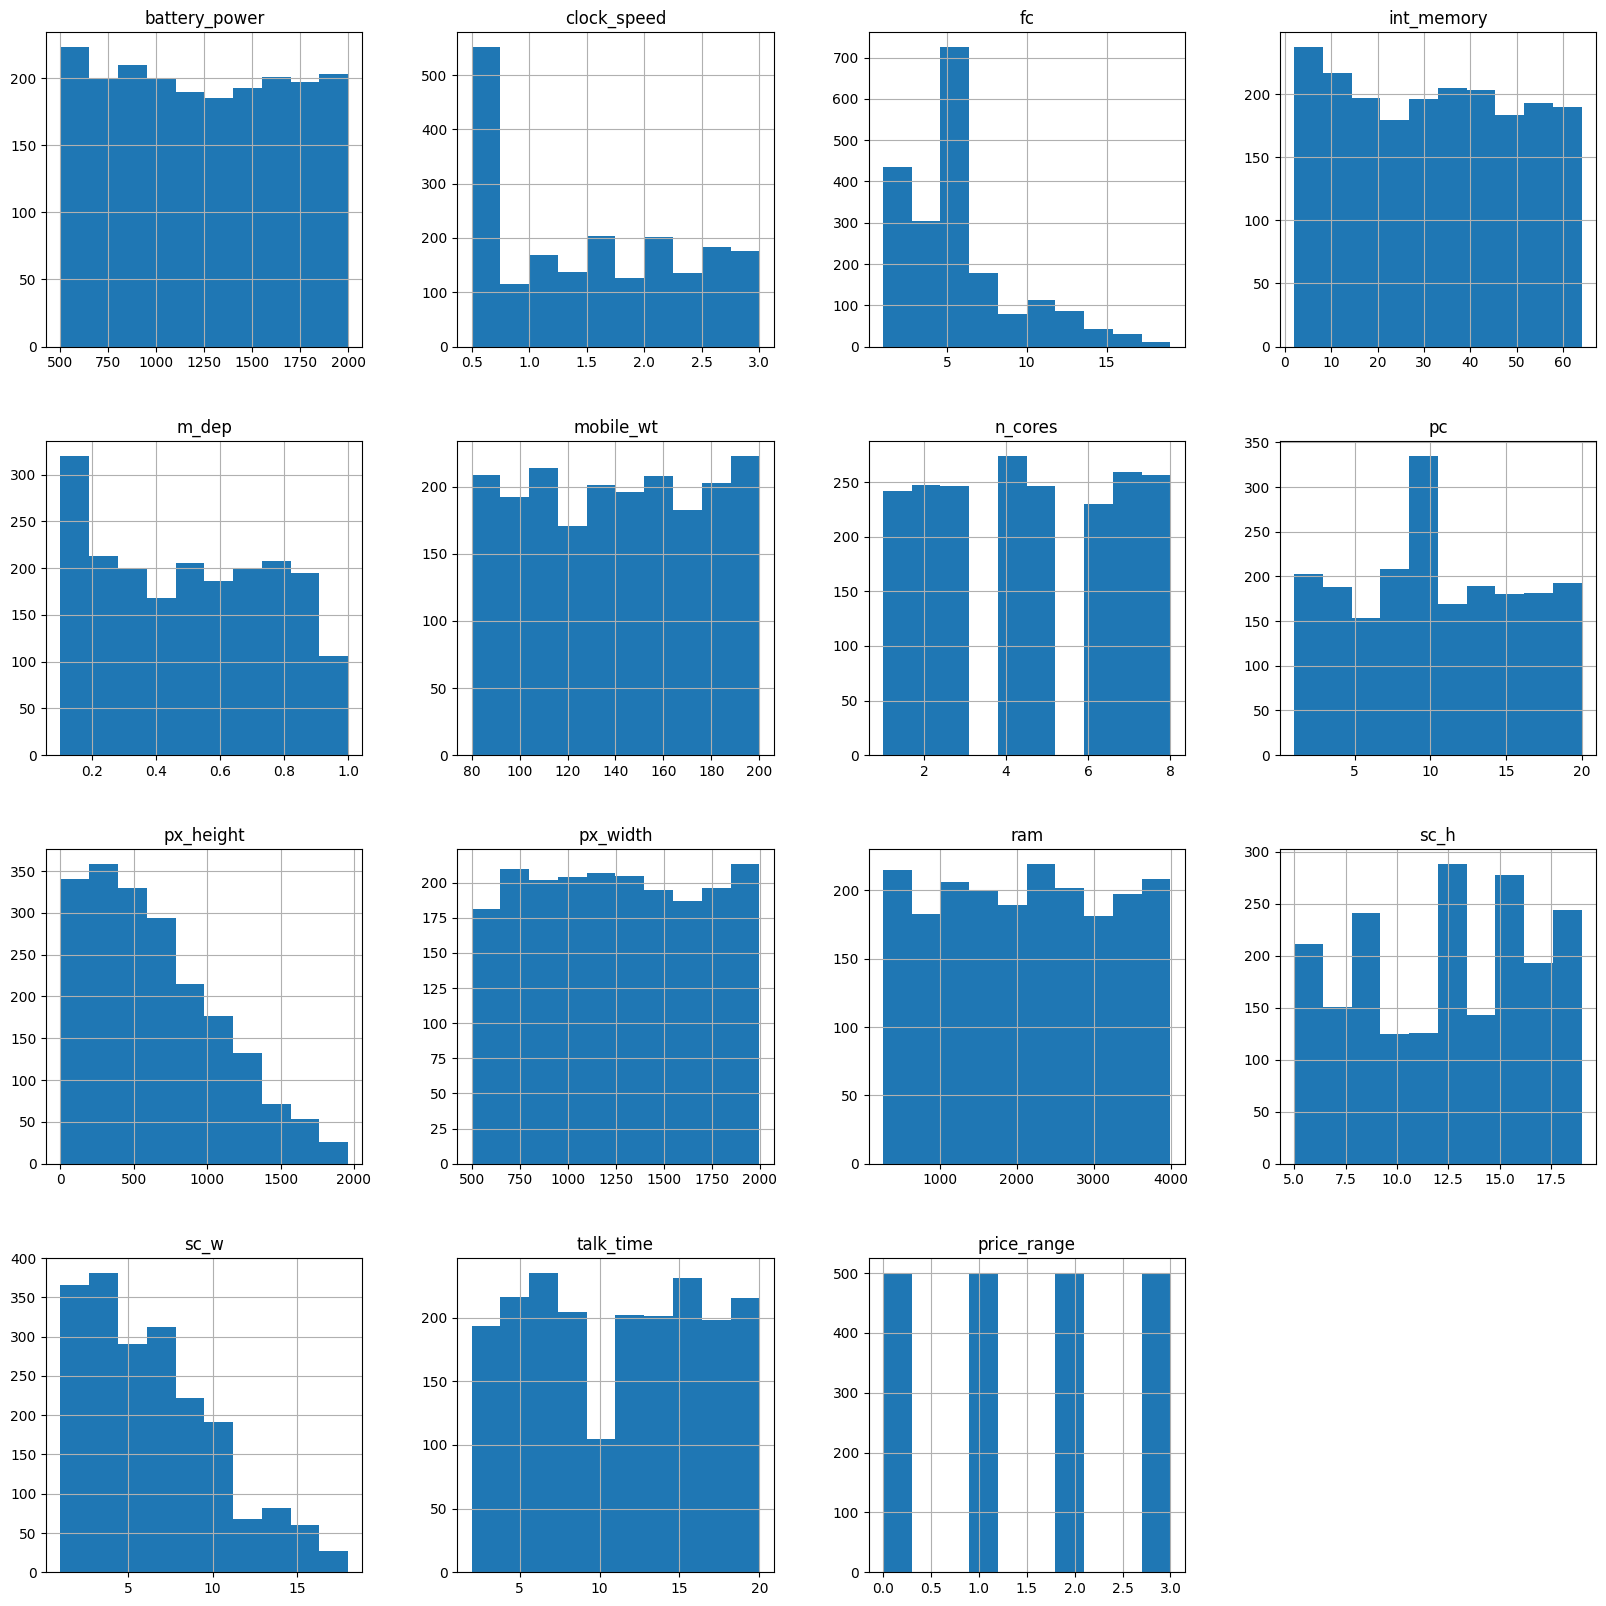

In [ ]:
df.hist(figsize=(20,20))

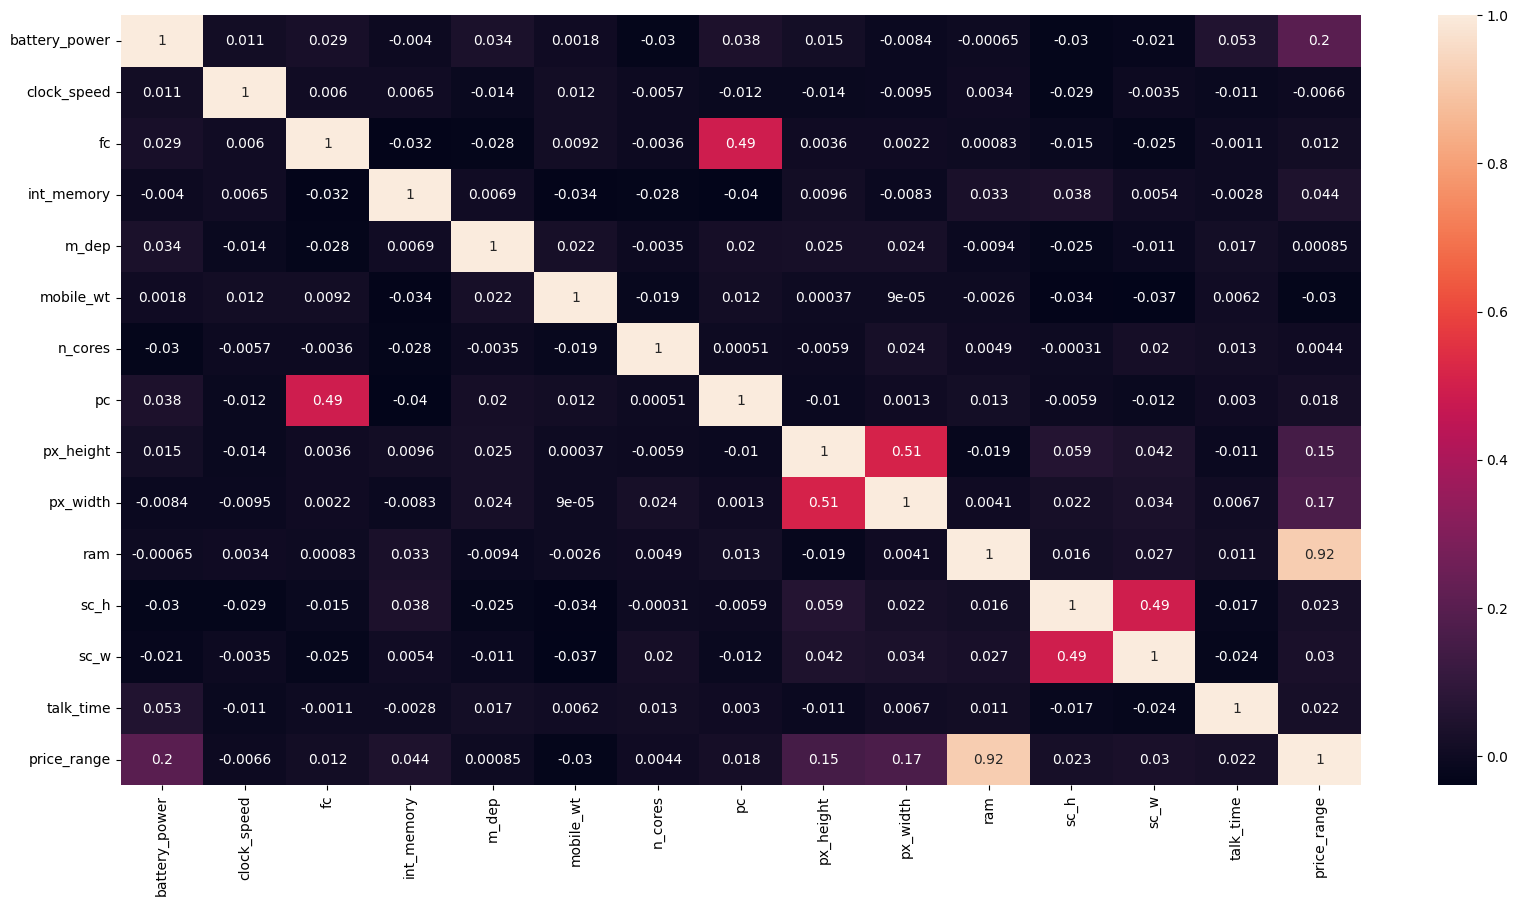

In [ ]:
#Using Pearson Correlation

plt.figure(figsize=(20,10))
cor =df.corr()
sns.heatmap(cor, annot=True)
plt.show()

clock_speed and m_dep variable are weakly moderatetly correlated with price range

ram is strongly moderate correlated with price range

In [ ]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

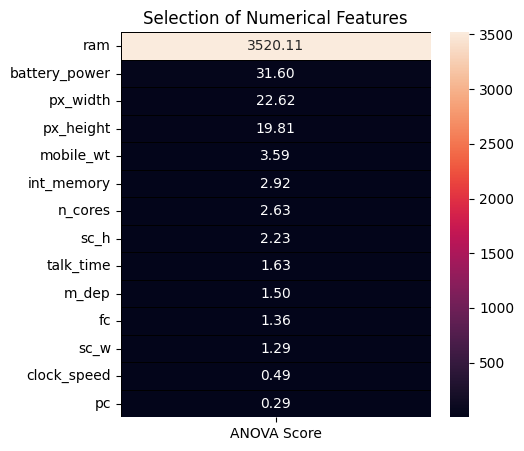

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time',]


features = df.loc[:,numerical_features]
target = df.loc[:,'price_range']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

##It is use when you want to compare the means of three or more groups to determine if there are statistically significant differences between them.

#data transformation

##creating X and Y

In [ ]:
X = df.drop('price_range', axis = 1)
Y = df['price_range']

In [ ]:
Y=Y.astype(int)

In [ ]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor as vif

vif_df= pd.DataFrame()
vif_df['features']=X.columns
vif_df['VIP Factor']= [vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIP Factor
0,battery_power,7.92
1,clock_speed,4.24
2,fc,4.50
3,int_memory,3.92
4,mobile_wt,12.38
5,n_cores,4.59
6,pc,5.76
7,px_height,4.26
8,px_width,11.54
9,ram,4.61


In [ ]:
X=X.drop(['m_dep'],axis=1)

In [ ]:
# X=X.drop(['clock_speed'],axis=1)

##Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

#Applied Models:

KNN

SVM

Decision tree

Random forest

XGBOOST

#predicting using knn clasifier


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                                 metric='euclidean')

model_knn.fit(X_train,Y_train)

Y_pred= model_knn.predict(X_test)


#Evaluating the Model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report   # Model Evaluation

In [ ]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print('classification report: ')
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print('accuracy of the model: ',acc)

[[138   2   0   0]
 [  8 144   5   0]
 [  0  13 135   9]
 [  0   0   9 137]]
classification report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       140
           1       0.91      0.92      0.91       157
           2       0.91      0.86      0.88       157
           3       0.94      0.94      0.94       146

    accuracy                           0.92       600
   macro avg       0.92      0.93      0.92       600
weighted avg       0.92      0.92      0.92       600

accuracy of the model:  0.9233333333333333


In [ ]:
model_knn.score(X_train, Y_train)           #training accuracy

0.9321428571428572

In [ ]:
# trial nd error method     (always use this)

my_dict ={}
for K in range(1,10):
  model_knn = KNeighborsClassifier(n_neighbors=K,
                                 metric='euclidean')

  model_knn.fit(X_train,Y_train)

  Y_pred= model_knn.predict(X_test)
  print('accuracy is ',accuracy_score(Y_test,Y_pred), 'for k-value:',K)
  my_dict[K]=accuracy_score(Y_test,Y_pred)



accuracy is  0.91 for k-value: 1
accuracy is  0.8916666666666667 for k-value: 2
accuracy is  0.9183333333333333 for k-value: 3
accuracy is  0.9083333333333333 for k-value: 4
accuracy is  0.9283333333333333 for k-value: 5
accuracy is  0.9116666666666666 for k-value: 6
accuracy is  0.9266666666666666 for k-value: 7
accuracy is  0.91 for k-value: 8
accuracy is  0.9233333333333333 for k-value: 9


In [ ]:
for K in my_dict:
  if my_dict[K]==max(my_dict.values()):
    print(K,':',my_dict[K])

5 : 0.9283333333333333


In [ ]:
#predicting using knn clasifier

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5,
                                 metric='euclidean')

model_knn.fit(X_train,Y_train)

Y_pred= model_knn.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report   # Model Evaluation

In [ ]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print('classification report: ')
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print('accuracy of the model: ',acc)

[[136   4   0   0]
 [  9 145   3   0]
 [  0   7 138  12]
 [  0   0   8 138]]
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       140
           1       0.93      0.92      0.93       157
           2       0.93      0.88      0.90       157
           3       0.92      0.95      0.93       146

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

accuracy of the model:  0.9283333333333333


# **SVM**

In [ ]:
# SVM
from sklearn import svm
svc_model=svm.SVC(kernel='rbf')
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
#print(list(Y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score,\
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[137   3   0   0]
 [  5 150   2   0]
 [  0   9 138  10]
 [  0   0   5 141]]
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       140
           1       0.93      0.96      0.94       157
           2       0.95      0.88      0.91       157
           3       0.93      0.97      0.95       146

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

Accuracy of the model:  0.9433333333333334


In [ ]:
# change the kernel

from sklearn import svm
svc_model=svm.SVC(kernel='poly')
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
#print(list(Y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score,\
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[140   0   0   0]
 [  5 150   2   0]
 [  0   6 143   8]
 [  0   0   4 142]]
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       140
           1       0.96      0.96      0.96       157
           2       0.96      0.91      0.93       157
           3       0.95      0.97      0.96       146

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

Accuracy of the model:  0.9583333333333334


##Decision Tree

In [ ]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score,\
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[128  12   0   0]
 [ 16 129  12   0]
 [  0  20 113  24]
 [  0   0  14 132]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       140
           1       0.80      0.82      0.81       157
           2       0.81      0.72      0.76       157
           3       0.85      0.90      0.87       146

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

Accuracy of the model:  0.8366666666666667


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
y_pred = rf_clf.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[132   8   0   0]
 [ 11 137   9   0]
 [  0  19 127  11]
 [  0   0   8 138]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.84      0.87      0.85       157
           2       0.88      0.81      0.84       157
           3       0.93      0.95      0.94       146

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [ ]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

# model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10)
model_RandomForest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)


# Accuracy check
from sklearn.metrics import confusion_matrix, accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)



[[132   8   0   0]
 [ 14 131  12   0]
 [  0  21 128   8]
 [  0   0   8 138]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       140
           1       0.82      0.83      0.83       157
           2       0.86      0.82      0.84       157
           3       0.95      0.95      0.95       146

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600

Accuracy of the model:  0.8816666666666667


# **XGB**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
 # Gradient Booster
gb = GradientBoostingClassifier(random_state=20)
# model_pred(gb, 'Gradient Booster')


# model_DecisionTree=DecisionTreeClassifier(random_state=10)

# #fit the model on the data and predict the values
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[134   6   0   0]
 [ 10 143   4   0]
 [  0  16 130  11]
 [  0   0   6 140]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       140
           1       0.87      0.91      0.89       157
           2       0.93      0.83      0.88       157
           3       0.93      0.96      0.94       146

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

Accuracy of the model:  0.9116666666666666


In [ ]:
mobile_df=pd.DataFrame()                #compairing actual or predicted price range
mobile_df=X_test

mobile_df['price_range']=Y_test
mobile_df['Predicted_price_range']=Y_pred
mobile_df

,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,Predicted_price_range
115,1900,1.0000,18,89,7,9.000000,1055.0,1661,2871,12,1.000000,13,3,3
1779,1807,5.6481,16,125,3,10.443918,1221.0,1415,2921,8,5.000000,17,3,3
1449,602,9.0000,50,141,8,18.000000,1571.0,1717,2189,7,5.000000,16,2,2
145,1814,1.0000,9,141,2,2.000000,756.0,786,3556,18,12.000000,16,3,3
1009,1881,4.0000,51,158,5,7.000000,477.0,1553,1229,12,6.337363,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1154,12.0000,14,156,7,14.000000,251.0,1801,587,8,3.000000,4,0,0
870,1673,7.0000,9,187,3,10.000000,65.0,734,3669,9,1.000000,10,3,3
1827,1692,4.0000,2,106,1,17.000000,1899.0,1904,3779,9,3.000000,7,3,3
1533,642,5.6481,38,86,5,10.000000,887.0,1775,435,9,2.000000,2,0,0


Conclusion:SVM perform best out of all with an accuracy of 96 .